In [10]:
from itertools import permutations
import matplotlib.pyplot as plt
import math
from pathlib import Path
from collections import defaultdict
# from sklearn.metrics import r2_score

import numpy as np
import csv
from enum import Enum


class PermutationType(Enum):
    UNIFORMLY_DISTRIBUTED = 'random'
    REVERSE_SORTED = 'reverse'
    ALMOST_SORTED = 'almost'

DATA_DIRECTORY = Path('data')

def get_data_path(permutation:PermutationType, algorithm_name: str) -> Path:
    directory = DATA_DIRECTORY/algorithm_name
    directory.mkdir(parents = True, exist_ok = True)

    return (directory / permutation.value).with_suffix('.csv')

def load_data(algorithm_name: str, permutation:PermutationType):
    path = get_data_path(permutation, algorithm_name)
    data = defaultdict(list)
    with path.open() as csvfile:
        reader = csv.reader(csvfile)

        for row in reader:
            data[int(row[0])].append(int(row[1]))
        
    return data
def load_avg_data(algorithm_name: str, permutation: PermutationType):
    data = load_data(algorithm_name, permutation)
    sizes, avg_times = list(), list()

    for size, elapsed_time in sorted(data.items()):
        sizes.append(size)
        avg_times.append(sum(elapsed_time)/ len (elapsed_time))

    return sizes, avg_times

def add_to_plot(algorithm_name: str, permutation: PermutationType):
    sizes, avg_times = load_avg_data(algorithm_name, permutation)
    x = sizes
    y = avg_times
    plt.loglog(sizes, avg_times, '.',  markersize = 12)
    logx, logy = np.log(sizes), np.log(avg_times)
    m, b = np.polyfit(logx, logy, 1)
    fit = np.poly1d((m, b)) # log y = m * log x + b
    expected_logy = fit(logx)
    # plt.loglog(sizes, , label = "check ")
    plt.loglog(x[::len(x)-1], (math.e ** expected_logy)[::len(y)-1], '--', label = f'{algorithm_name} ({str(permutation)[16:]}): {m:0.5} log x + {b:.5}', markersize = 6)

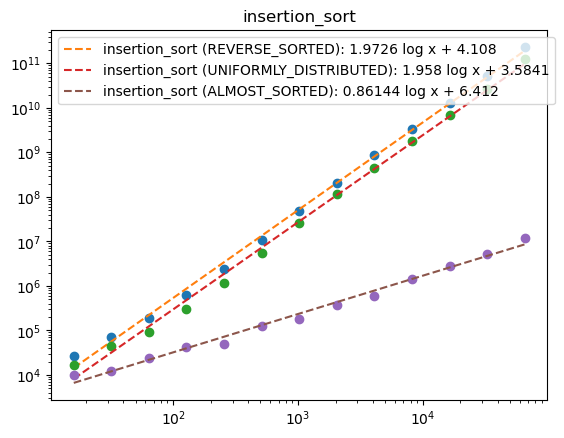

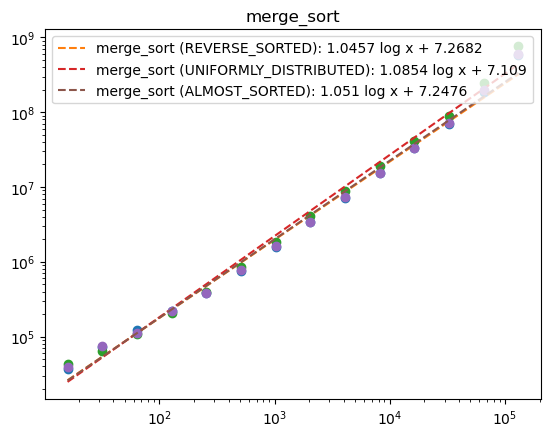

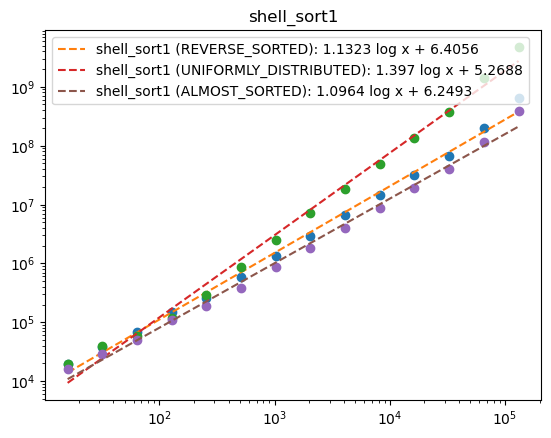

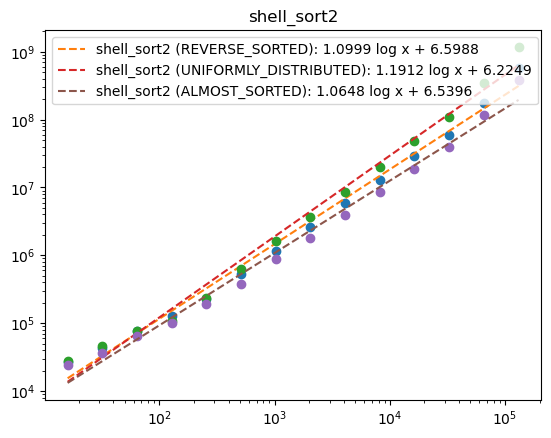

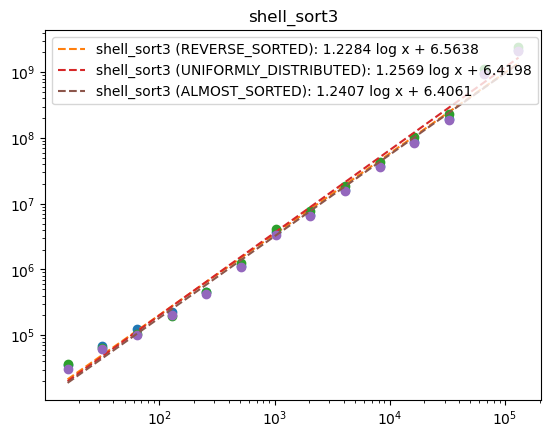

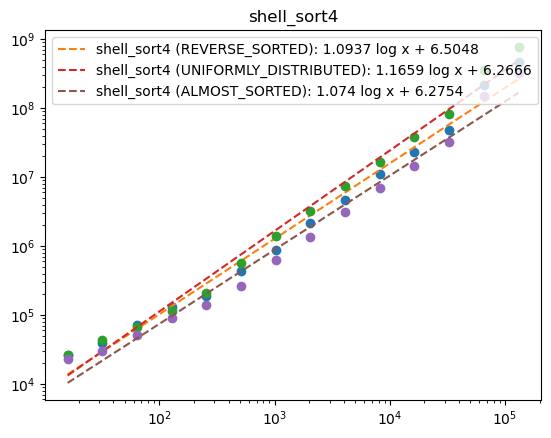

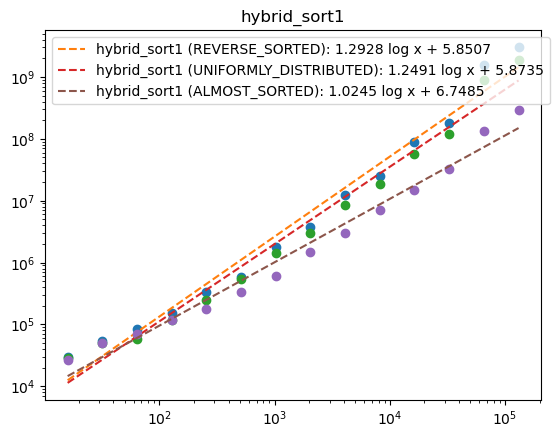

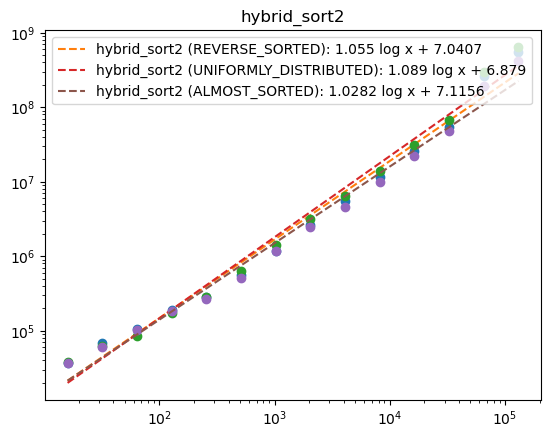

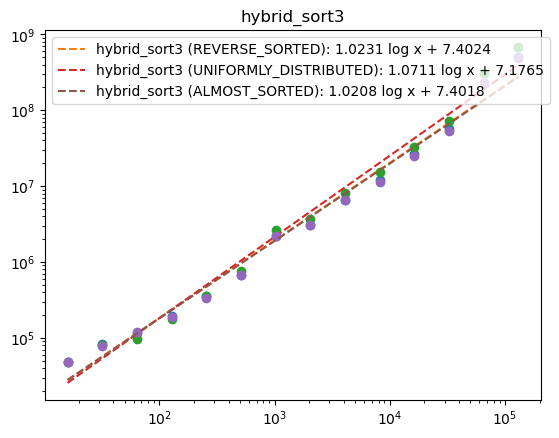

In [12]:
from benchmark import SORTING_ALGORITHMS
for algo_names in SORTING_ALGORITHMS.keys(): 
    plt.title(algo_names)
    add_to_plot(algo_names, PermutationType.REVERSE_SORTED)
    add_to_plot(algo_names, PermutationType.UNIFORMLY_DISTRIBUTED)
    add_to_plot(algo_names, PermutationType.ALMOST_SORTED)
    plt.legend(loc='upper left')
    plt.show()